In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [43]:
data_gtg = pd.read_csv('ginis_finales_gtg.csv')
data_ba = pd.read_csv('ginis_finales_ba.csv')
data_er = pd.read_csv('ginis_finales_er.csv')
data_mf = pd.read_csv('ginis_finales_mf.csv')
for data in [data_gtg, data_ba, data_er, data_mf]:
    data['std_n'] = data['std_gini'] / np.sqrt(10)
data_mf.head()

,f,gini,std_gini,std_n
0,0.00,0.998240,0.000225,0.000071
1,0.02,0.993594,0.001677,0.000530
2,0.04,0.955293,0.004295,0.001358
3,0.06,0.932098,0.005786,0.001830
4,0.08,0.916387,0.003992,0.001263


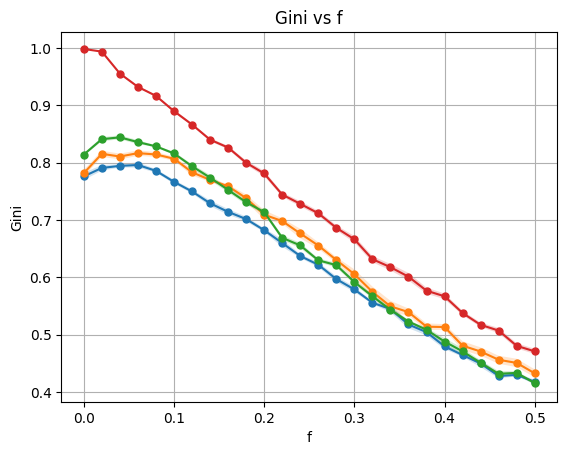

In [44]:
# Plot the gini vs f plot for each data set and add the std as a shaded region (do not use errorbar)
plt.figure()
for data in [data_gtg, data_ba, data_er, data_mf]:
    if(len(data)>30):
        plt.fill_between(data['f'][::2], data['gini'][::2]-data['std_n'][::2], data['gini'][::2]+data['std_n'][::2], alpha=0.2)
        plt.plot(data['f'][::2], data['gini'][::2], 'o', markersize=5, linestyle='-')
    else:
        plt.fill_between(data['f'], data['gini']-data['std_n'], data['gini']+data['std_n'], alpha=0.2)
        plt.plot(data['f'], data['gini'], 'o', markersize=5, linestyle='-')
plt.xlabel('f')
plt.ylabel('Gini')
plt.title('Gini vs f')
plt.grid()
# Fix the legends (use the labels GTG, BA, ER, MF only for the points, not shades)


# plt.savefig('gini_vs_f.png')
plt.show()
# plt.figure()
# for data in [data_gtg, data_ba, data_er, data_mf]:
#     if(len(data)>30):
#         plt.errorbar(data['f'][::2], data['gini'][::2], yerr=data['std_gini'][::2], fmt='o', markersize=5, linestyle='-')
#     else:
#         plt.errorbar(data['f'], data['gini'], yerr=data['std_gini'], fmt='o', markersize=5, linestyle='-')
#     # plt.plot(data['f'], data['gini'], 'o', markersize=5, linestyle='-')
# plt.xlabel('f')
# plt.ylabel('Gini')
# plt.title('Gini vs f')
# plt.grid()
# plt.legend(['GTG', 'BA', 'ER', 'MF'])
# # plt.savefig('gini_vs_f.png')
# plt.show()


In [38]:
import networkx as nx
import numpy as np
import enzope

In [40]:
def print_info(gtgs):
    cons = [gtgs[i].get_mean_degree()[0] for i in range(len(gtgs))]
    clust = [[nx.average_clustering(gtgs[i].G) for i in range(len(gtgs))]]
    assort = [nx.degree_assortativity_coefficient(gtgs[i].G) for i in range(len(gtgs))]
    print(f"Mean k: {np.mean(cons):.2f} +- {np.std(cons):.2f}")
    print(f"Mean clustering: {np.mean(clust):.2f} +- {np.std(clust):.2f}")
    print(f"Mean assortativity: {np.mean(assort):.2f} +- {np.std(assort):.2f}")

def r1(x):
    return x**-1

# Params
reps = 10
n_nodes = 1000
theta = 65
mcs = 200000

def graph_ensemble():
    gtgs = [enzope.graphs.graph_class.GTG(n_nodes=n_nodes, theta=theta, join='add', p_dist=r1) for i in range(reps)]
    print(f'theta={theta}')
    print_info(gtgs)
    return gtgs

graph_ensemble();

theta=65
Mean k: 4.20 +- 0.31
Mean clustering: 0.53 +- 0.02
Mean assortativity: -0.12 +- 0.03


In [34]:
nodes = 1000
reps = 100

bas = [nx.barabasi_albert_graph(nodes, 2) for _ in range(reps)]
# Average degree, clustering and degree assortativity of the BA graphs
degrees = [np.mean([ba.degree[i] for i in range(nodes)]) for ba in bas]
clustering = [nx.average_clustering(ba) for ba in bas]
assortativity = [nx.degree_assortativity_coefficient(ba) for ba in bas]

# Average degree, clustering and degree assortativity of the BA graphs
print(f"<k>: {np.mean(degrees):.3f} +- {np.std(degrees):.10f}")
print(f"C: {np.mean(clustering):.3f} +- {np.std(clustering):.3f}")
print(f"r: {np.mean(assortativity):.3f} +- {np.std(assortativity):.3f}")

# np.mean([ba.degree[i] for i in range(nodes)]), nx.average_clustering(ba), nx.degree_assortativity_coefficient(ba)

<k>: 3.992 +- 0.0000000000
C: 0.027 +- 0.006
r: -0.093 +- 0.014


In [36]:
# Same for erdos renyi graph
ers = [nx.erdos_renyi_graph(nodes, 0.00405) for _ in range(reps)]
# Average degree, clustering and degree assortativity of the ER graphs
degrees = [np.mean([er.degree[i] for i in range(nodes)]) for er in ers]
clustering = [nx.average_clustering(er) for er in ers]
assortativity = [nx.degree_assortativity_coefficient(er) for er in ers]

# Average degree, clustering and degree assortativity of the ER graphs
print(f"<k>: {np.mean(degrees):.3f} +- {np.std(degrees):.10f}")
print(f"C: {np.mean(clustering):.3f} +- {np.std(clustering):.3f}")
print(f"r: {np.mean(assortativity):.3f} +- {np.std(assortativity):.3f}")


<k>: 4.041 +- 0.0869474577
C: 0.004 +- 0.001
r: 0.003 +- 0.023
